# Decision Tree

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#This assumes the data is in a zip folder called data.zip. Change the name according to what you have.
!unzip data.zip
!rm data.zip

Archive:  data.zip
  inflating: D1.txt                  
  inflating: __MACOSX/._D1.txt       
  inflating: D2.txt                  
  inflating: __MACOSX/._D2.txt       
  inflating: D3leaves.txt            
  inflating: __MACOSX/._D3leaves.txt  
  inflating: Dbig.txt                
  inflating: __MACOSX/._Dbig.txt     
  inflating: Druns.txt               
  inflating: __MACOSX/._Druns.txt    


In [66]:
filename = "D2.txt" # You can set what dataset you're using here
data = pd.read_csv(filename, delim_whitespace=True, header=None, names=['x', 'y', 'label'])
data.head()
len(data)

1000

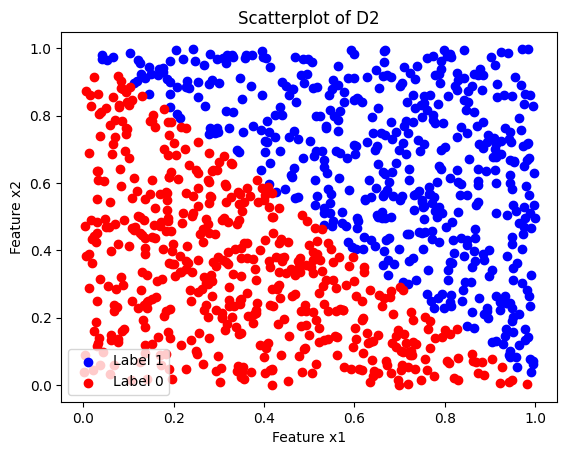

In [67]:
label_1 = data[data['label'] == 1]
label_0 = data[data['label'] == 0]

plt.scatter(label_1['x'], label_1['y'], color='blue', label='Label 1')
plt.scatter(label_0['x'], label_0['y'], color='red', label='Label 0')

plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.title('Scatterplot of D2')
plt.legend()
plt.show()

In [61]:
# Helper functions
def entropy(y):
    unique, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(y, y_left, y_right):
  p = len(y_left) / len(y)
  return entropy(y) - p * entropy(y_left) - (1 - p) * entropy(y_right)

def gain_ratio(y, y_left, y_right):
    p = len(y_left) / len(y)
    q = 1 - p
    split_entropy = 0 - (p*np.log2(p)) - (q*np.log2(q))
    return information_gain(y, y_left, y_right) / (split_entropy)

In [62]:
data.head()

x         y  label
0  0.264185  0.178456      0
1  0.409499  0.213456      1
2  0.926224  0.540329      1
3  0.573685  0.282145      1
4  0.953159  0.608121      1

In [63]:
# Main tree algorithm with some helper functions to further process the outputted tree
tree = {}
def train_tree(tree, data):
  # print(data)
  if len(data) == 0:
        return 1
  if np.all(data['label'].to_numpy() == data['label'].to_numpy()[0]):
      return data['label'].to_numpy()[0]

  # xmaxinfo =
  # ymaxinfo =
  best_split = None
  best_info_gain_ratio = 0

  for item in data['x']:
    left = data[data['x'] >= item]
    right = data[data['x'] < item]

    if len(left) > 0 and len(right) > 0:
      value = (gain_ratio(data['label'], left['label'], right['label']))
      # print('x', item, value)
      if value > best_info_gain_ratio:
        best_info_gain_ratio = value
        best_split = ('x', item)
  for item in data['y']:
    left = data[data['y'] >= item]
    right = data[data['y'] < item]

    if len(left) > 0 and len(right) > 0:
      value = (gain_ratio(data['label'], left['label'], right['label']))
      # print('y', item, value)
      if value > best_info_gain_ratio:
        best_info_gain_ratio = value
        best_split = ('y', item)

  if best_split is None:
    return 1
    # return np.bincount(data['label']).argmax()

  dim, value = best_split
  left_branch = None
  right_branch = None

  left = data[data[dim] >= value]
  right = data[data[dim] < value]
  left_branch = train_tree(tree, left)
  right_branch = train_tree(tree, right)

  return {'feature' : dim, 'threshold' : value, 'greater' : left_branch, "lesser" : right_branch}

def infer_tree(data, tree):
  if isinstance(tree, np.int64):
      return tree
  else:
      feature = tree['feature']
      threshold = tree['threshold']
      if data[feature] >= threshold:
          return infer_tree(data, tree['greater'])
      else:
          return infer_tree(data, tree['lesser'])

def get_boundaries(tree, vals):
  if isinstance(tree, np.int64):
    return []

  vals.append((tree['feature'], tree['threshold']))

  vals = vals + get_boundaries(tree['greater'], [])
  vals = vals + get_boundaries(tree['lesser'], [])

  return vals

def get_boundaries_with_leaves(tree, vals):
  if isinstance(tree, np.int64) or isinstance(tree, int):
    return [('val', tree)]

  vals.append((tree['feature'], tree['threshold']))

  vals = vals + get_boundaries_with_leaves(tree['greater'], [])
  vals = vals + get_boundaries_with_leaves(tree['lesser'], [])

  return vals

def plotter2(tree, datarange, label=""):
  n = 100000
  x = np.random.uniform(datarange[0], datarange[1], n)
  y = np.random.uniform(datarange[0], datarange[1], n)
  plotdata = pd.DataFrame({'x':x, 'y':y})
  pred = []

  for point in plotdata.itertuples():
    temp = {}
    temp['x'] = point.x
    temp['y'] = point.y
    pred.append(infer_tree(temp, tree))
  plotdata['labels'] = pred

  df_label0 = plotdata[plotdata['labels'] == 0]
  df_label1 = plotdata[plotdata['labels'] == 1]

  plt.scatter(df_label0['x'], df_label0['y'], c='r', marker='o', label='Label 0', s=10)
  plt.scatter(df_label1['x'], df_label1['y'], c='b', marker='o', label='Label 1', s=10)
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.title(label)

  plt.legend()
  plt.show()

In [53]:
traindata = data

In [54]:
traindata

x         y  label
0    0.315561  0.956006      1
1    0.344972  0.693422      1
2    0.398419  0.974354      1
3    0.347109  0.566740      0
4    0.985903  0.564388      1
..        ...       ...    ...
995  0.418671  0.044160      0
996  0.794456  0.142425      0
997  0.384576  0.609262      0
998  0.843186  0.848278      1
999  0.691812  0.751075      1

[1000 rows x 3 columns]

In [55]:
tree = train_tree(tree, traindata)

In [56]:
print(tree)

{'feature': 'x', 'threshold': 0.533076, 'greater': {'feature': 'y', 'threshold': 0.228007, 'greater': {'feature': 'y', 'threshold': 0.424906, 'greater': 1, 'lesser': {'feature': 'x', 'threshold': 0.708127, 'greater': 1, 'lesser': {'feature': 'y', 'threshold': 0.32625, 'greater': {'feature': 'x', 'threshold': 0.595471, 'greater': {'feature': 'x', 'threshold': 0.646007, 'greater': 1, 'lesser': {'feature': 'y', 'threshold': 0.403494, 'greater': 1, 'lesser': 0}}, 'lesser': 0}, 'lesser': 0}}}, 'lesser': {'feature': 'x', 'threshold': 0.887224, 'greater': {'feature': 'y', 'threshold': 0.037708, 'greater': {'feature': 'y', 'threshold': 0.082895, 'greater': 1, 'lesser': {'feature': 'x', 'threshold': 0.960783, 'greater': 1, 'lesser': 0}}, 'lesser': 0}, 'lesser': {'feature': 'x', 'threshold': 0.850316, 'greater': {'feature': 'y', 'threshold': 0.169053, 'greater': 1, 'lesser': 0}, 'lesser': 0}}}, 'lesser': {'feature': 'y', 'threshold': 0.88635, 'greater': {'feature': 'x', 'threshold': 0.041245, 'g

In [57]:
vals = get_boundaries(tree, [])
print(vals)
print(len(vals))

[('x', 0.533076), ('y', 0.228007), ('y', 0.424906), ('x', 0.708127), ('y', 0.32625), ('x', 0.595471), ('x', 0.646007), ('y', 0.403494), ('x', 0.887224), ('y', 0.037708), ('y', 0.082895), ('x', 0.960783), ('x', 0.850316), ('y', 0.169053), ('y', 0.88635), ('x', 0.041245), ('x', 0.104043), ('x', 0.07642), ('y', 0.691474), ('x', 0.254049), ('x', 0.191915), ('y', 0.792752), ('y', 0.864128), ('x', 0.144781), ('y', 0.534979), ('x', 0.426073), ('x', 0.409972), ('x', 0.417579), ('x', 0.393227), ('x', 0.39583)]
30


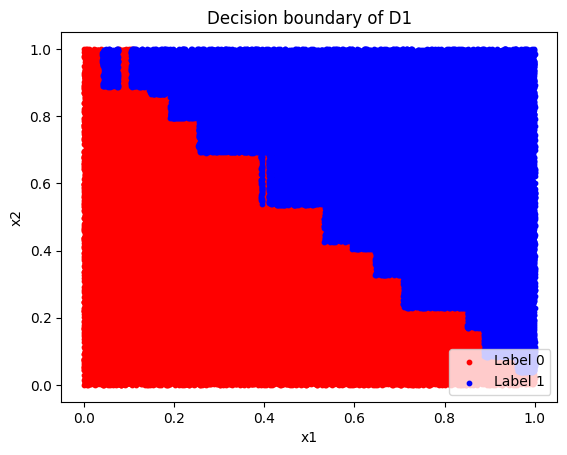

In [58]:
# plotter(traindata)
plotter2(tree, [0, 1], "Decision boundary of D1")

In [59]:
def decision_tree_to_plaintext(tree, indent=0):
    if isinstance(tree, dict):
        feature = tree['feature']
        threshold = tree['threshold']
        greater_branch = decision_tree_to_plaintext(tree['greater'], indent + 1)
        lesser_branch = decision_tree_to_plaintext(tree['lesser'], indent + 1)
        return f"{'  ' * indent}if {feature} >= {threshold}:\n{greater_branch}\n{'  ' * indent}else:\n{lesser_branch}"
    else:
        return f"{'  ' * indent}{tree}"

plaintext_tree = decision_tree_to_plaintext(tree)
print(plaintext_tree)

if x >= 0.533076:
  if y >= 0.228007:
    if y >= 0.424906:
      1
    else:
      if x >= 0.708127:
        1
      else:
        if y >= 0.32625:
          if x >= 0.595471:
            if x >= 0.646007:
              1
            else:
              if y >= 0.403494:
                1
              else:
                0
          else:
            0
        else:
          0
  else:
    if x >= 0.887224:
      if y >= 0.037708:
        if y >= 0.082895:
          1
        else:
          if x >= 0.960783:
            1
          else:
            0
      else:
        0
    else:
      if x >= 0.850316:
        if y >= 0.169053:
          1
        else:
          0
      else:
        0
else:
  if y >= 0.88635:
    if x >= 0.041245:
      if x >= 0.104043:
        1
      else:
        if x >= 0.07642:
          0
        else:
          1
    else:
      0
  else:
    if y >= 0.691474:
      if x >= 0.254049:
        1
      else:
        if x >= 0.191915:
          if y >= 0

# Bad dataset

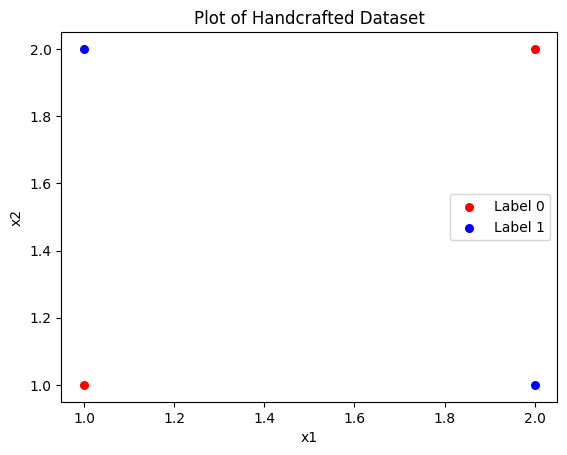

In [ ]:
x = np.array([1, 2, 1, 2])
y = np.array([1, 1, 2, 2])

x_idx = [0, 3]
y_idx = [1, 2]

plt.scatter(x[x_idx], y[x_idx], c='r', marker='o', label='Label 0', s=30)
plt.scatter(x[y_idx], y[y_idx], c='b', marker='o', label='Label 1', s=30)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot of Handcrafted Dataset")

plt.legend()
plt.show()

# Sampling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
filename = "Dbig.txt"
data = pd.read_csv(filename, delim_whitespace=True, header=None, names=['x', 'y', 'label'])
data.head()
len(data)

10000

In [ ]:
data.head()

x         y  label
0 -1.499372  0.976384      1
1 -1.499224 -0.517983      1
2 -1.498880 -1.271624      1
3 -1.498383  1.456647      1
4 -1.498293 -1.290862      1

In [ ]:
proportion = 0.8192
training, testing = train_test_split(data, test_size=(1-0.8192), random_state=42)
training.reset_index(inplace=True)
testing.reset_index(inplace=True)
training.drop(columns='index', inplace=True)
testing.drop(columns='index', inplace=True)
print(len(training))
print(len(testing))

8192
1808


In [ ]:
training.head()

x         y  label
0 -0.954592 -1.350456      1
1  0.157230  1.087580      0
2 -0.090903 -0.805564      0
3 -0.540127 -0.608507      1
4 -0.826887  0.073159      0

In [ ]:
testing.head()

x         y  label
0  0.406305  1.489930      1
1 -0.061844  0.093950      0
2 -0.956772 -0.419392      1
3 -0.045501  0.753653      0
4 -0.110102  1.475900      1

In [ ]:
datasplits = []
datasplitsizes = [32, 128, 512, 2048]

for item in datasplitsizes:
  datasplits.append(training[:item])
datasplits.append(training)
print([len(x) for x in datasplits])

[32, 128, 512, 2048, 8192]


# Evaluating mine

In [ ]:
n = [32, 128, 512, 2048, 8192]
errn = []
nodes = []
trees = []
for item in datasplits:
  tree = train_tree({}, item)
  trees.append(tree)
  vals = get_boundaries_with_leaves(tree, [])
  nodes.append(len(vals))
  pred = []
  test = testing['label'].to_numpy()
  for point in testing.itertuples():
    temp = {}
    temp['x'] = point.x
    temp['y'] = point.y
    pred.append(infer_tree(temp, tree))
  pred = np.array(pred)
  print(f"Training size: {len(item)}, Nodes: {len(vals)}, errn {1-np.equal(pred, test).sum()/len(pred)}")
  errn.append(1-(np.equal(pred, test).sum()/len(pred)))

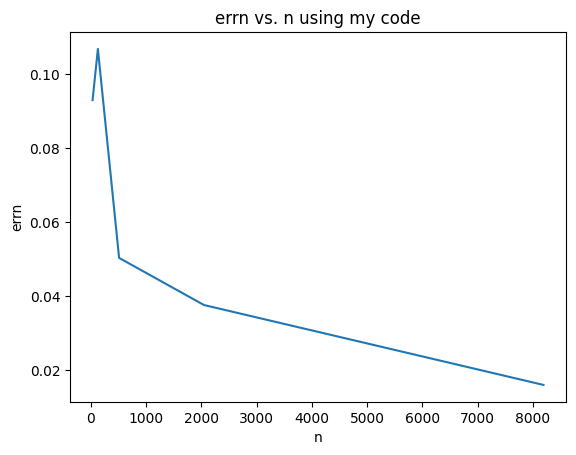

In [ ]:
plt.plot(n, errn)
plt.title('errn vs. n using my code')
plt.xlabel('n')
plt.ylabel('errn')

plt.show()

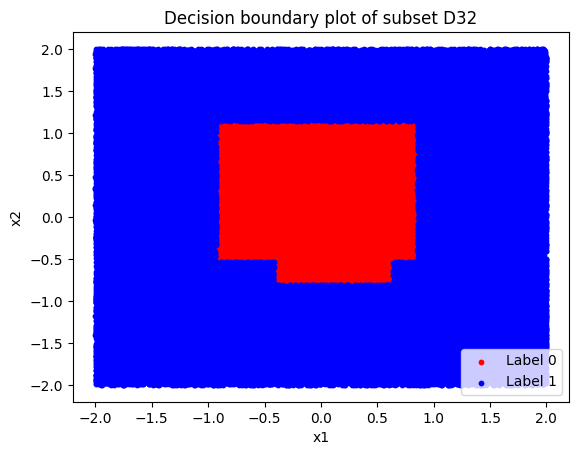

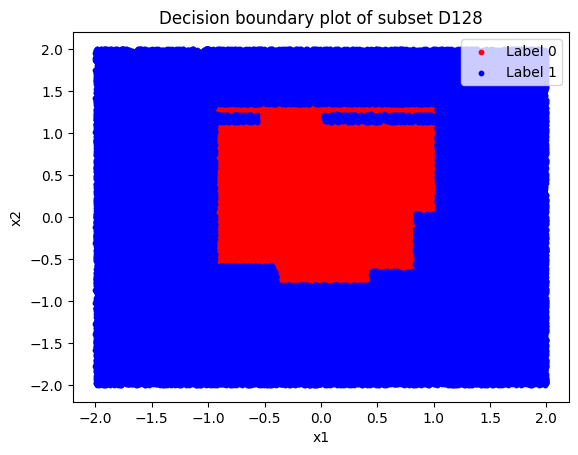

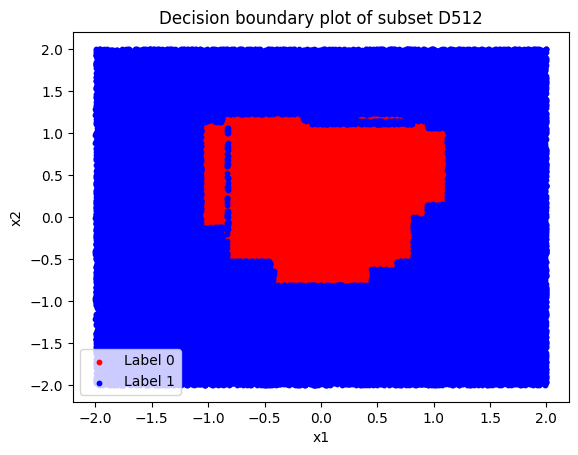

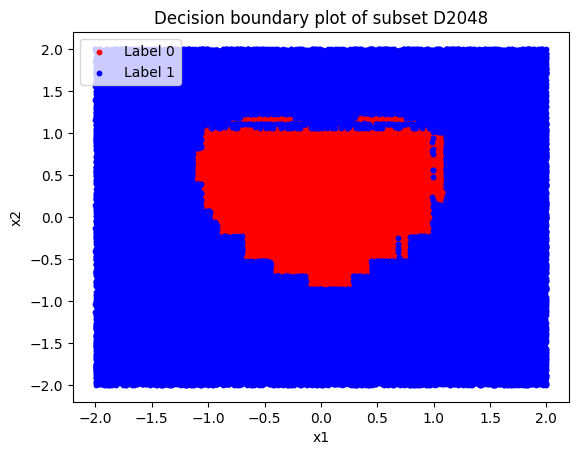

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


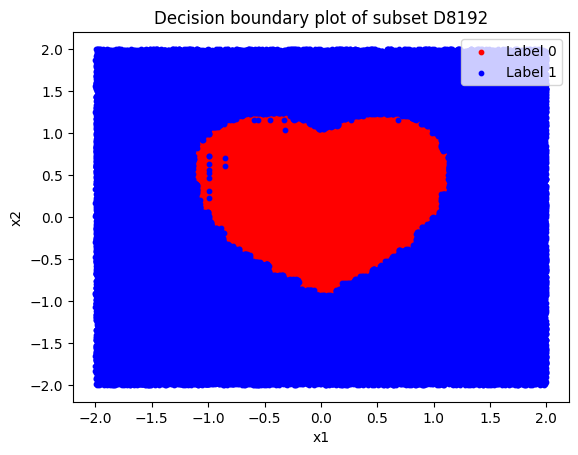

In [ ]:
for i, item in enumerate(trees):
  plotter2(item, [-2, 2], label=f"Decision boundary plot of subset D{n[i]}")

# Sklearn

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
clf = DecisionTreeClassifier(random_state=0)

In [3]:
x_test = testing.iloc[:, :2].to_numpy()
y_test = testing.iloc[:, 2].to_numpy()
errn = []
nodes = []

for item in datasplits:
  clf = DecisionTreeClassifier(random_state=0)
  x = item.iloc[:, :2].to_numpy()
  y = item.iloc[:, 2].to_numpy()
  clf.fit(x, y)
  node = clf.tree_.node_count
  y_pred = clf.predict(x_test)
  error = 1 - accuracy_score(y_test, y_pred)
  errn.append(error)
  nodes.append(node)
  print(f"Training size: {len(item)}, Nodes: {node}, errn {error}")

NameError: ignored

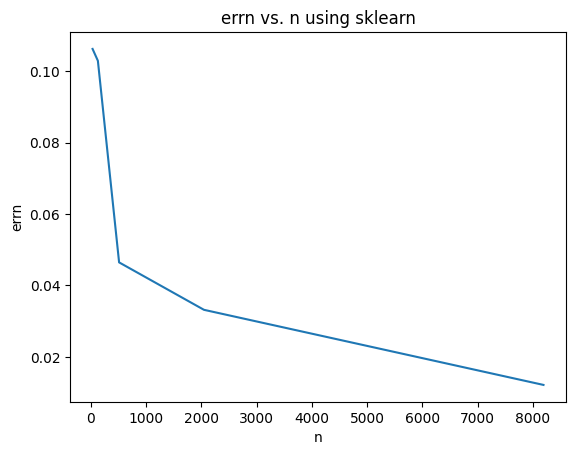

In [ ]:
plt.plot(n, errn)
plt.title('errn vs. n using sklearn')
plt.xlabel('n')
plt.ylabel('errn')

plt.show()

# Lagrange

In [4]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

In [16]:
def myLagrange(a, b, n, sigma=0, label='Lagrange Interpolation', noise=False):

  np.random.seed(0)
  x_train = None
  y_train = None

  if not noise:
    x_train = np.sort(np.random.uniform(a, b, n))
    y_train = np.sin(x_train)
  else:
    x_train = np.sort(np.random.uniform(a, b, n))
    x_train = x_train + np.random.normal(0, sigma, n)
    y_train = np.sin(x_train)

  x_test = np.sort(np.random.uniform(a, b, n))
  y_test = np.sin(x_test)

  lagrange_polynomial = lagrange(x_train, y_train)

  y_train_predicted = lagrange_polynomial(x_train)
  y_test_predicted = lagrange_polynomial(x_test)

  train_error = np.log(np.mean((y_train_predicted - y_train) ** 2))
  test_error = np.log(np.mean((y_test_predicted - y_test) ** 2))

  # plt.scatter(x_train, y_train, label='True Train Data', c='b')
  # plt.scatter(x_test, y_test, label='True Test Data', c='g')
  # x_range = np.linspace(a, b, 1000)
  # plt.plot(x_range, lagrange_polynomial(x_range), label=label, c='r')
  # # plt.ylim(-1, 1)
  # plt.legend()
  # plt.show()

  print(f"Train Error: {train_error:.4f}")
  print(f"Test Error: {test_error:.4f}")
  return train_error, test_error

In [17]:
myLagrange(0, 2*(np.pi), 100)

Train Error: 340.2542
Test Error: 341.2968


(340.25424032166745, 341.29680441482924)

In [18]:
test_errors = []
train_errors = []
for i in range(0, 100):
  tr, te = myLagrange(0, 2*(np.pi), 100, i, f"Lagrange interpolation with sigma={i}", True)
  train_errors.append(tr)
  test_errors.append(te)

Train Error: 340.2542
Test Error: 339.4976
Train Error: 385.6776
Test Error: 372.1628
Train Error: 360.9231
Test Error: 313.6875
Train Error: 348.2571
Test Error: 259.8082
Train Error: 313.6170
Test Error: 193.8087
Train Error: 298.8157
Test Error: 155.2261
Train Error: 290.3860
Test Error: 120.6483
Train Error: 284.9145
Test Error: 101.5469
Train Error: 269.4376
Test Error: 75.9691
Train Error: 254.2886
Test Error: 52.5001
Train Error: 250.2813
Test Error: 40.7364
Train Error: 253.7236
Test Error: 38.4925
Train Error: 240.9482
Test Error: 22.1179
Train Error: 243.8539
Test Error: 18.5544
Train Error: 239.0422
Test Error: 9.5868
Train Error: 237.8985
Test Error: 4.2955
Train Error: 239.1498
Test Error: 4.8660
Train Error: 231.9059
Test Error: -4.4323
Train Error: 223.7963
Test Error: -11.1565
Train Error: 226.7142
Test Error: -14.5618
Train Error: 224.9774
Test Error: -19.6002
Train Error: 222.9375
Test Error: -21.9912
Train Error: 224.5685
Test Error: -22.4569
Train Error: 221.4966
Te

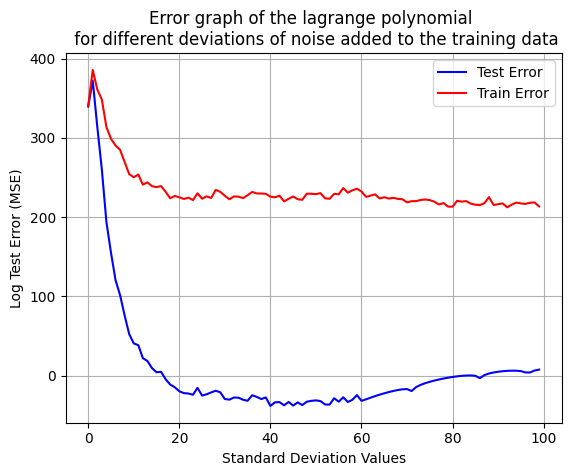

In [20]:
x_values = np.arange(0, 100)

plt.plot(x_values, test_errors, color='b', label='Test Error')
plt.plot(x_values, train_errors, color='r', label='Train Error')
plt.title('Error graph of the lagrange polynomial \n for different deviations of noise added to the training data')
plt.xlabel('Standard Deviation Values')
plt.ylabel('Log Test Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()